# Data Exploration
<br>
<br>
<br>
Traditional Haiku Structure

- There are only three lines, totaling 17 syllables.
- The first line is 5 syllables.
- The second line is 7 syllables.
- The third line is 5 syllables like the first.
- Punctuation and capitalization are up to the poet, and need not follow the rigid rules used in structuring sentences.

<div class="alert alert-box alert-info">
    
Data is record
    
Values to store the truth

Does the one know it?

</div>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [70]:
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))

In [71]:
from wrangle import wrangle_grades

In [72]:
df = wrangle_grades()

In [73]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_validate, test_size=.1, random_state=123)

In [76]:
train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

##  Continuous and Continuous

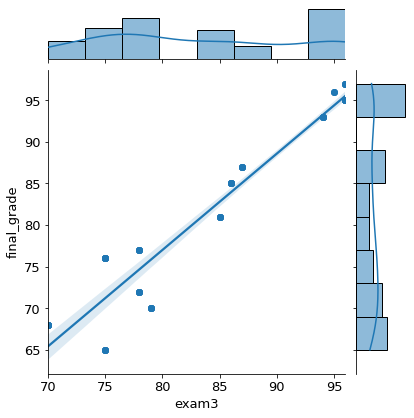

In [77]:
sns.jointplot(x='exam3',
              y='final_grade',
              data=train,
              kind='reg'
             );

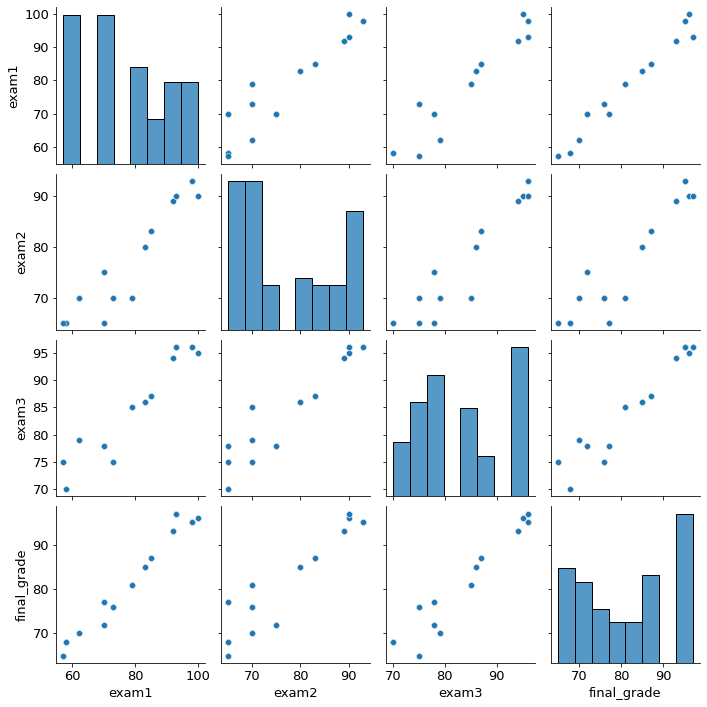

In [78]:
sns.pairplot(data=train);

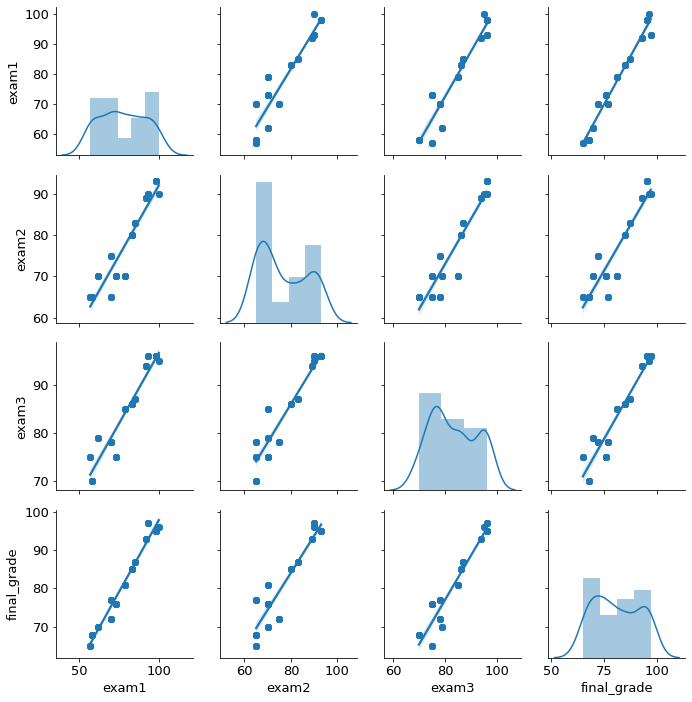

In [79]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot);

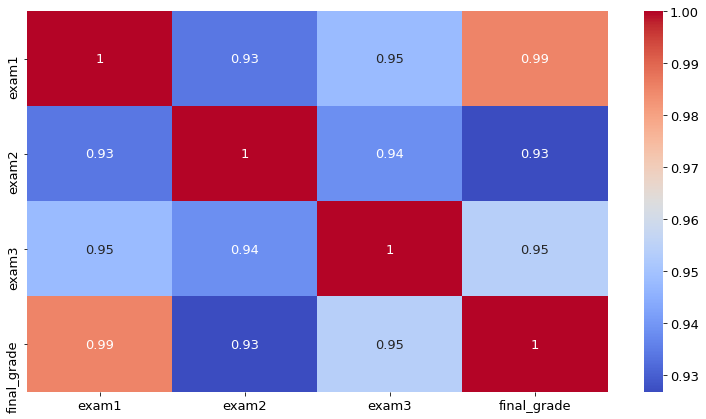

In [80]:
a = np.zeros_like(train.corr())

sns.heatmap(train.corr(),
           cmap='coolwarm',
           annot=True);

## Continous and Categorical

In [83]:
train['exam1_letter_grade'] = pd.cut(train.exam1,
                                     bins=[0, 70, 80, 90, 105],
                                     labels=['D', 'C', 'B', 'A']
                                    )

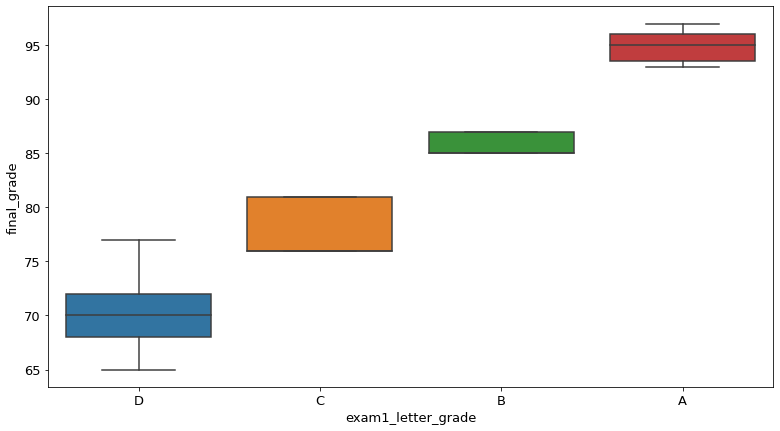

In [85]:
sns.boxplot(data=train,
            y='final_grade',
            x='exam1_letter_grade'
           );

__Takeaways__:
- Students with D's have more variation in exam 1 grade than other letter grades.
- Students with B's have the least variation in exam 1

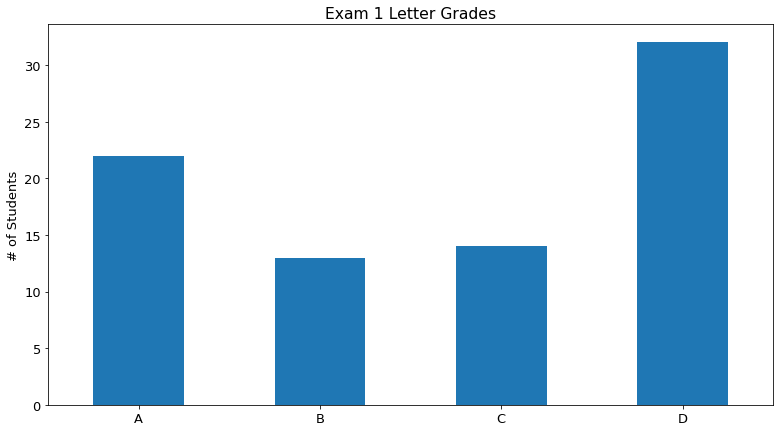

In [96]:
train.exam1_letter_grade.value_counts().sort_index(ascending=False).plot.bar()                                                                      
plt.xticks(rotation=0)
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades');

In [110]:
np.random.seed(125)
train['classroom'] = np.random.choice(['One','Two'], train.shape[0])

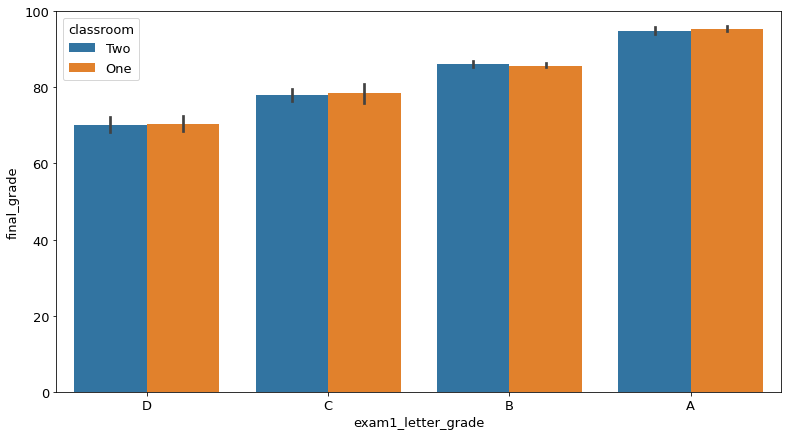

In [111]:
sns.barplot(data=train,
            y='final_grade',
            x='exam1_letter_grade',
            hue='classroom')

plt.ylim(0, 100);

Takeaways:

The distribution of grades in classrooom one and classroom two are about the same.
Classroom doesn't impact final grade?

- $H_0$ There is no difference in final grade between classroom one and classroom two
- $H_1$ There is no difference in final grade between classroom one and classroom two

In [112]:
from scipy import stats

t, p = stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False
)

In [113]:
print(f"p-value {p:.2%}")

p-value 88.25%
